In [1]:
# import nasapy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
# from IPython.display import Image
from config.config import NASA_API_KEY
from api_methods import closes_approach, get_nasa_images, get_planet_data, display_nasa_thumbnail

In [2]:
# Get the data from the NASA_API_KEY and save it to a file
# Example usage
result = closes_approach(date_min='2019-01-01', date_max='2019-12-31', dist_max=0.01)

In [3]:
# Create a DataFrame from the 'data' key
df = pd.DataFrame(result['data'], columns=result['fields'])
df.head()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2019 AS3,2,2458485.682928227,2019-Jan-02 04:23,0.00420532365912753,0.00419084571441033,0.00421980105401907,14.3899152957483,14.3458171168367,00:02,28.1
1,2016 AV64,5,2458485.807648488,2019-Jan-02 07:23,0.00755301029795811,0.00621787465376375,0.151010363133769,14.9822562191111,14.958691800543,8_01:22,27.18
2,2019 AE3,3,2458486.423760958,2019-Jan-02 22:10,0.00520698549207061,0.00519034377659616,0.00522362704652594,8.45945441370815,8.39874657697308,< 00:01,27.4
3,2019 AB,4,2458487.971282891,2019-Jan-04 11:19,0.0036795944851475,0.00367661055192861,0.00368257834893046,9.81234333488798,9.73826655706798,< 00:01,26.42
4,2019 AH3,3,2458489.457530031,2019-Jan-05 22:59,0.00342841126472953,0.00342305194800279,0.003433770502278,17.9891971160312,17.9459427351924,< 00:01,28.22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   des        331 non-null    object
 1   orbit_id   331 non-null    object
 2   jd         331 non-null    object
 3   cd         331 non-null    object
 4   dist       331 non-null    object
 5   dist_min   331 non-null    object
 6   dist_max   331 non-null    object
 7   v_rel      331 non-null    object
 8   v_inf      326 non-null    object
 9   t_sigma_f  331 non-null    object
 10  h          331 non-null    object
dtypes: object(11)
memory usage: 28.6+ KB


In [5]:
# Convert the 'dist', 'dist_min', and 'dist_max' columns to float
df['dist'] = df['dist'].astype(float)
df['dist_min'] = df['dist_min'].astype(float)
df['dist_max'] = df['dist_max'].astype(float)

In [6]:
print("Örneklem Sayısı:", len(df))

Örneklem Sayısı: 331


In [7]:
df.head()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2019 AS3,2,2458485.682928227,2019-Jan-02 04:23,0.004205,0.004191,0.004220,14.3899152957483,14.3458171168367,00:02,28.1
1,2016 AV64,5,2458485.807648488,2019-Jan-02 07:23,0.007553,0.006218,0.151010,14.9822562191111,14.958691800543,8_01:22,27.18
2,2019 AE3,3,2458486.423760958,2019-Jan-02 22:10,0.005207,0.005190,0.005224,8.45945441370815,8.39874657697308,< 00:01,27.4
3,2019 AB,4,2458487.971282891,2019-Jan-04 11:19,0.003680,0.003677,0.003683,9.81234333488798,9.73826655706798,< 00:01,26.42
4,2019 AH3,3,2458489.457530031,2019-Jan-05 22:59,0.003428,0.003423,0.003434,17.9891971160312,17.9459427351924,< 00:01,28.22


In [8]:
# belirli bir tarih için Astronomy Picture of the Day (APOD)
result = get_nasa_images(NASA_API_KEY, date='2023-12-24')

In [9]:
result

{'date': '2023-12-24',
 'explanation': "What's that in the center?  Like a butterfly, a white dwarf star begins its life by casting off a cocoon of gas that enclosed its former self.  In this analogy, however, the Sun would be a caterpillar and the ejected shell of gas would become the prettiest cocoon of all.  In the featured cocoon, the planetary nebula designated NGC 2440 contains one of the hottest white dwarf stars known.  The white dwarf can be seen as the bright orange dot near the image center.  Our Sun will eventually become a white dwarf butterfly, but not for another 5 billion years.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2312/ngc2440e_hst_960.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'NGC 2440: Cocoon of a New White Dwarf',
 'url': 'https://apod.nasa.gov/apod/image/2312/ngc2440e_hst_960.jpg'}

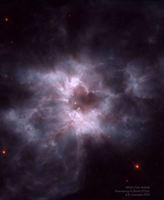

In [10]:
display_nasa_thumbnail(NASA_API_KEY, date='2023-12-24')

In [11]:
# Güneş sistemindeki gezegenlerin adları: mercury, venus, earth, mars, jupiter, saturn, uranus, neptune
planet_name = 'mars'
result = get_planet_data(NASA_API_KEY, planet_name)

In [12]:
result

{'id': 'mars',
 'name': 'Mars',
 'englishName': 'Mars',
 'isPlanet': True,
 'moons': [{'moon': 'Phobos',
   'rel': 'https://api.le-systeme-solaire.net/rest/bodies/phobos'},
  {'moon': 'Deïmos',
   'rel': 'https://api.le-systeme-solaire.net/rest/bodies/deimos'}],
 'semimajorAxis': 227939200,
 'perihelion': 206700000,
 'aphelion': 249200000,
 'eccentricity': 0.0935,
 'inclination': 1.85,
 'mass': {'massValue': 6.41712, 'massExponent': 23},
 'vol': {'volValue': 1.6318, 'volExponent': 11},
 'density': 3.9341,
 'gravity': 3.71,
 'escape': 5030.0,
 'meanRadius': 3389.5,
 'equaRadius': 3396.19,
 'polarRadius': 3376.2,
 'flattening': 0.00589,
 'dimension': '',
 'sideralOrbit': 686.98,
 'sideralRotation': 24.6229,
 'aroundPlanet': None,
 'discoveredBy': '',
 'discoveryDate': '',
 'alternativeName': '',
 'axialTilt': 25.19,
 'avgTemp': 210,
 'mainAnomaly': 19.412,
 'argPeriapsis': 286.231,
 'longAscNode': 49.667,
 'bodyType': 'Planet'}

In [13]:
df_planet = pd.DataFrame([result])
df_planet.head()

,id,name,englishName,isPlanet,moons,semimajorAxis,perihelion,aphelion,eccentricity,inclination,...,aroundPlanet,discoveredBy,discoveryDate,alternativeName,axialTilt,avgTemp,mainAnomaly,argPeriapsis,longAscNode,bodyType
0,mars,Mars,Mars,True,"[{'moon': 'Phobos', 'rel': 'https://api.le-sys...",227939200,206700000,249200000,0.0935,1.85,...,None,,,,25.19,210,19.412,286.231,49.667,Planet
